
# Exports

# Experiments:


- Without density

- With density

- With density + gdpcap

- With density + gdpcap + wto + contig

- With density + pci + gdpcap + wto + contig

- With density + pop 

In [1]:
%load_ext autotime
%matplotlib inline

time: 470 ms (started: 2023-07-07 16:34:03 +03:00)


In [2]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 805 ms (started: 2023-07-07 16:34:04 +03:00)


In [3]:
data =  pd.read_csv('Data/SimpleApproach/Exports/Exports2018-19CumulativeGravityHSlevelComplexity.csv')
data.dropna(inplace=True)
data

,refYear,reporterCode,partnerCode,distw_harmonic,contig,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,...,wto_o,wto_d,refMonth,cmdCode,primaryValue,previous_year_primaryvalue,2HScmdCode,4HScmdCode,pci,density
0,2018,31.0,4.0,1754.0,0.0,4.711294e+07,1.805323e+07,4.740,0.486,9939.771,...,0.0,1.0,1,40310,73103.23,919459.61,4,403,0.875573,0.021209
1,2018,31.0,4.0,1754.0,0.0,4.711294e+07,1.805323e+07,4.740,0.486,9939.771,...,0.0,1.0,2,40310,68658.93,935433.80,4,403,0.875573,0.021209
2,2018,31.0,4.0,1754.0,0.0,4.711294e+07,1.805323e+07,4.740,0.486,9939.771,...,0.0,1.0,3,40310,92149.63,936389.79,4,403,0.875573,0.021209
3,2018,31.0,4.0,1754.0,0.0,4.711294e+07,1.805323e+07,4.740,0.486,9939.771,...,0.0,1.0,4,40310,77202.39,961346.94,4,403,0.875573,0.021209
4,2018,31.0,4.0,1754.0,0.0,4.711294e+07,1.805323e+07,4.740,0.486,9939.771,...,0.0,1.0,5,40310,82862.27,962905.93,4,403,0.875573,0.021209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59034836,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,2,846291,1991.00,1991.00,84,8462,2.698500,0.030157
59034837,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,2,846330,16922.00,16922.00,84,8463,2.289032,0.029007
59034838,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,3,847920,79726.00,79726.00,84,8479,0.534465,0.036734
59034839,2019,894.0,834.0,1380.0,1.0,2.330867e+07,6.113687e+07,1.305,1.054,17861.034,...,1.0,1.0,8,870710,1076.00,1076.00,87,8707,3.884524,0.027991


time: 2min 18s (started: 2023-07-07 16:34:04 +03:00)


In [4]:
def MPE(Y_actual,Y_Predicted):
    mape = np.mean((Y_actual - Y_Predicted)/Y_actual)*100
    return mape

def MAPE(Y_actual,Y_Predicted):
    mpe = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mpe

data['primaryValue'] = data['primaryValue']/1000000
data['gdp_o'] = data['gdp_o']/1000000
data['gdp_d'] = data['gdp_d']/1000000
data['gdpcap_o'] = data['gdpcap_o']/1000000
data['gdpcap_d'] = data['gdpcap_d']/1000000
data['distw_harmonic'] = data['distw_harmonic']/1000

time: 1.04 s (started: 2023-07-07 16:36:23 +03:00)


## RF


In [5]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, oob_score=True,criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (14773030, 6)
X_train.shape:  (29087982, 6)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25

building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.9min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  3.1min remaining:   36.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.3s remaining:  1.0min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    5.8s remaining:    3.9s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    6.5s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    2.9s remaining:   33.6s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.87
R2 on validation data: 0.64
OOB Score (R-squared): 0.8
Mean Squared Error: 25.0
Mean Absolute Error: 0.34
Adjusted R^2 Score: 0.64
MAPE:  290851.3582353754
MPE:  -290835.43468282075
time: 5min 14s (started: 2023-07-07 16:36:24 +03:00)


Feature Importances:
 refYear           0.000
distw_harmonic    0.123
gdp_o             0.120
gdp_d             0.213
refMonth          0.007
cmdCode           0.537
dtype: float64


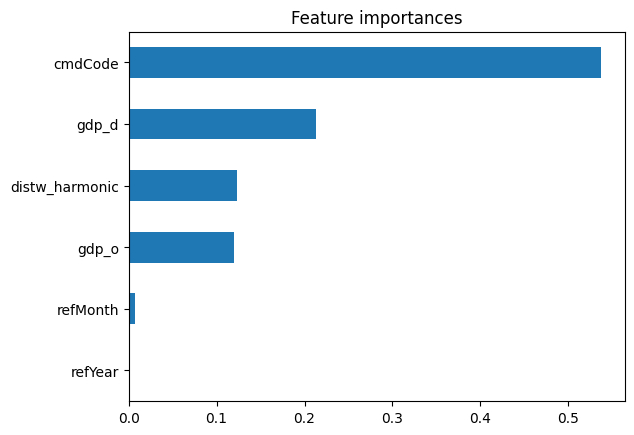

time: 309 ms (started: 2023-07-07 16:41:38 +03:00)


In [6]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

In [7]:
#+density
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (14773030, 7)
X_train.shape:  (29087982, 7)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.9min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  3.0min remaining:   34.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.1min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.2s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   10.5s remaining:    7.0s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   11.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.0s remaining:   57.5s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.89
R2 on validation data: 0.22
OOB Score (R-squared): 0.85
Mean Squared Error: 45.18
Mean Absolute Error: 0.53
Adjusted R^2 Score: 0.22
MAPE:  323630.2833746305
MPE:  -323615.56309359794
time: 5min 28s (started: 2023-07-07 16:41:39 +03:00)


Feature Importances:
 refYear           0.000
distw_harmonic    0.115
gdp_o             0.082
gdp_d             0.208
refMonth          0.004
cmdCode           0.355
density           0.235
dtype: float64


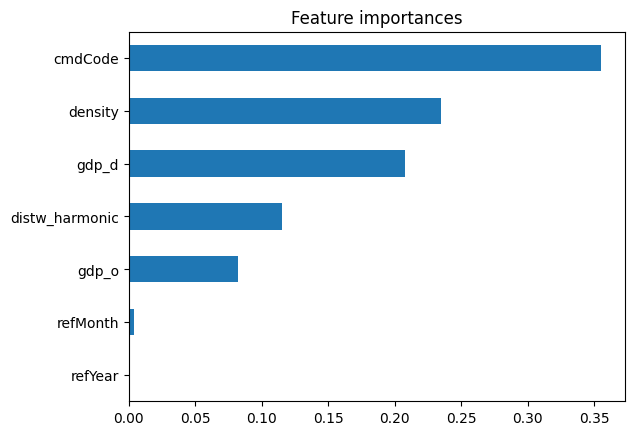

time: 652 ms (started: 2023-07-07 16:47:07 +03:00)


In [8]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 9)
X_train.shape:  (29087982, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  3.1min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  3.4min remaining:   39.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.5min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    4.7s remaining:   54.1s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    5.4s remaining:    3.6s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    6.6s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.1s remaining:   35.7s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.9
R2 on validation data: 0.31
OOB Score (R-squared): 0.87
Mean Squared Error: 39.73
Mean Absolute Error: 0.48
Adjusted R^2 Score: 0.31
MAPE:  312645.3245724305
MPE:  -312630.6571720299
Feature Importances:
 refYear           0.000
distw_harmonic    0.094
gdp_o             0.055
gdp_d             0.190
refMonth          0.003
cmdCode           0.356
density           0.230
gdpcap_o          0.044
gdpcap_d          0.028
dtype: float64


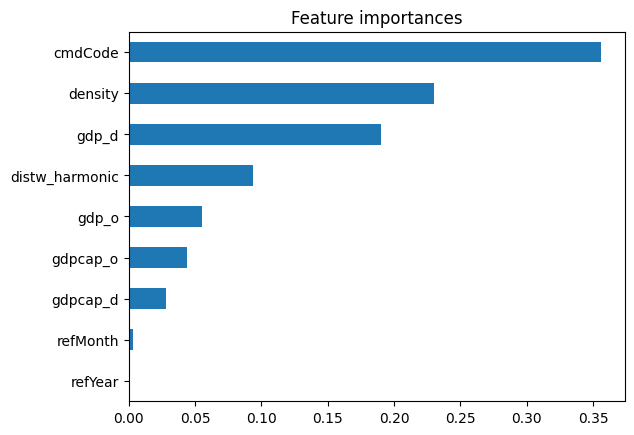

time: 5min 34s (started: 2023-07-07 16:47:08 +03:00)


In [9]:
# +density+gdpcap

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 10)
X_train.shape:  (29087982, 10)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  4.1min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.6min remaining:   52.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.9min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.1s remaining:  1.7min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   11.7s remaining:    7.8s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   13.1s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.3s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.9
R2 on validation data: 0.33
OOB Score (R-squared): 0.87
Mean Squared Error: 39.5
Mean Absolute Error: 0.41
Adjusted R^2 Score: 0.33
MAPE:  305854.8323026367
MPE:  -305839.4094260596
Feature Importances:
 refYear           0.000
distw_harmonic    0.097
gdp_o             0.045
gdp_d             0.194
refMonth          0.002
cmdCode           0.268
pci               0.159
density           0.176
gdpcap_o          0.039
gdpcap_d          0.021
dtype: float64


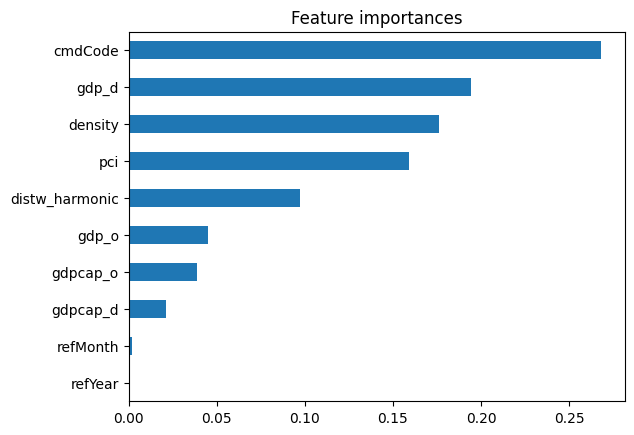

time: 8min 24s (started: 2023-07-07 16:52:42 +03:00)


In [10]:
# +density+gdpcap+pci

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 9)
X_train.shape:  (29087982, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  7.5min remaining: 16.0min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  7.9min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.1min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.5s remaining:  1.0min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    7.0s remaining:    4.7s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    8.0s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    2.3s remaining:   26.0s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.9
R2 on validation data: 0.25
OOB Score (R-squared): 0.86
Mean Squared Error: 41.98
Mean Absolute Error: 0.42
Adjusted R^2 Score: 0.25
MAPE:  315288.8668815206
MPE:  -315273.73848631093
Feature Importances:
 distw_harmonic    0.097
gdp_o             0.048
gdp_d             0.192
refMonth          0.002
cmdCode           0.257
pci               0.169
density           0.176
gdpcap_o          0.038
gdpcap_d          0.023
dtype: float64


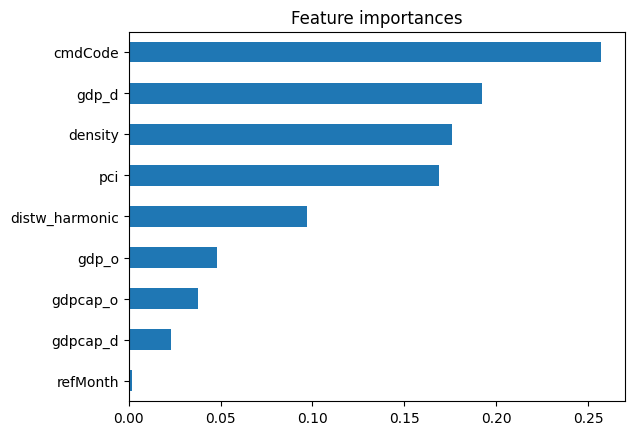

time: 10min 54s (started: 2023-07-07 17:01:07 +03:00)


In [11]:
# +density+gdpcap+pci + No year

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[[ 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

# Log transformations

X_val.shape:  (14773030, 6)
X_train.shape:  (29087982, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.6min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  2.8min remaining:   32.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.5s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   10.8s remaining:    7.2s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   11.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    6.0s remaining:  1.1min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.34
R2 on training data: 0.19
R2 on validation data: 0.12
MSE:  57.54
MAE:  0.28
R-square:  0.12
MAPE:  13575.04
MPE:  -13501.57
Feature Importances:
 refYear           0.000
distw_harmonic    0.104
gdp_o             0.275
gdp_d             0.212
refMonth          0.003
cmdCode           0.405
dtype: float64


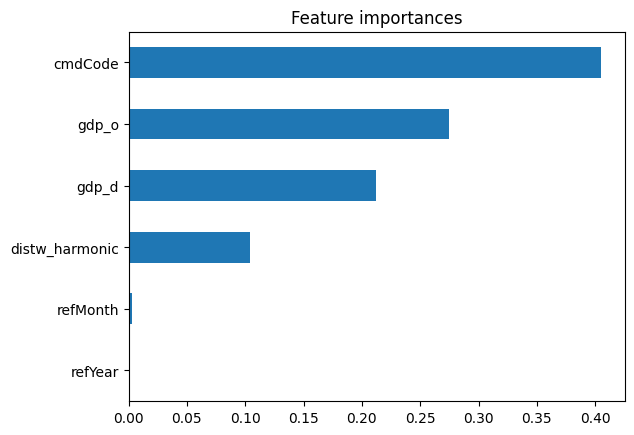

time: 5min 20s (started: 2023-07-07 17:12:01 +03:00)


In [12]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True, min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 7)
X_train.shape:  (29087982, 7)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.2min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  5.5min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.8min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   12.3s remaining:  2.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   15.6s remaining:   10.4s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   17.4s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    6.3s remaining:  1.2min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.39
R2 on training data: 0.37
R2 on validation data: 0.04
MSE:  59.93
MAE:  0.3
R-square:  0.04
MAPE:  19757.29
MPE:  -19685.97
Feature Importances:
 refYear           0.000
distw_harmonic    0.104
gdp_o             0.243
gdp_d             0.188
refMonth          0.002
cmdCode           0.259
density           0.203
dtype: float64


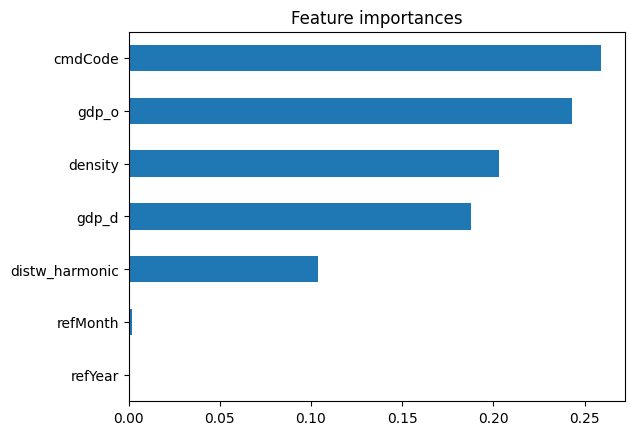

time: 9min 41s (started: 2023-07-07 17:48:57 +03:00)


In [17]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)



X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])


oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (14773030, 9)
X_train.shape:  (29087982, 9)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  7.3min remaining: 15.4min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  7.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.6min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.1s remaining:  1.6min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:   12.1s remaining:    8.1s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:   13.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    5.0s remaining:   57.2s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.4
R2 on training data: 0.3
R2 on validation data: 0.04
MSE:  57.4
MAE:  0.3
R-square:  0.04
MAPE:  17881.27
MPE:  -17810.07
Feature Importances:
 refYear           0.000
distw_harmonic    0.091
gdp_o             0.169
gdp_d             0.173
refMonth          0.002
cmdCode           0.245
density           0.206
gdpcap_o          0.080
gdpcap_d          0.033
dtype: float64


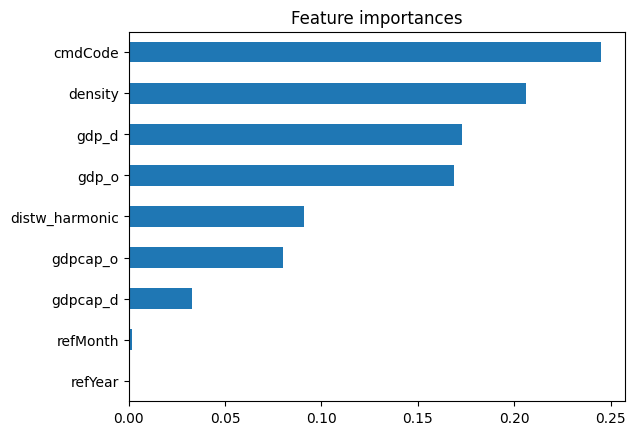

time: 10min 44s (started: 2023-07-07 17:58:39 +03:00)


In [18]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()


X_val.shape:  (14773030, 10)
X_train.shape:  (29087982, 10)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.0min remaining: 10.6min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  5.1min remaining:   58.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    6.5s remaining:  1.2min
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    7.2s remaining:    4.8s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    7.8s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.1s remaining:   36.0s
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.4
R2 on training data: 0.26
R2 on validation data: 0.06
MSE:  50.69
MAE:  0.3
R-square:  0.06
MAPE:  17101.01
MPE:  -17029.26
Feature Importances:
 refYear           0.000
distw_harmonic    0.088
gdp_o             0.167
gdp_d             0.171
refMonth          0.002
cmdCode           0.201
density           0.191
gdpcap_o          0.078
gdpcap_d          0.032
pci               0.070
dtype: float64


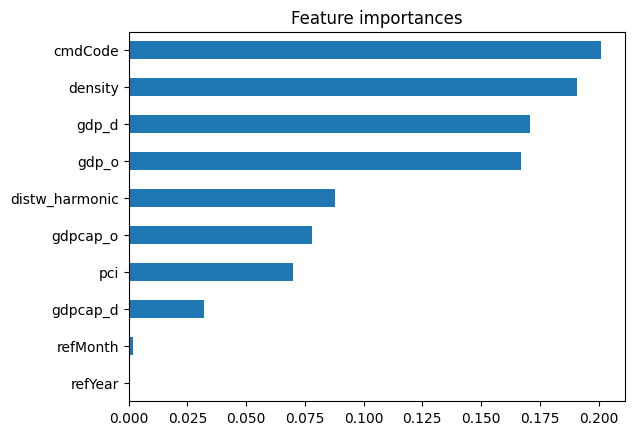

time: 7min 37s (started: 2023-07-07 18:09:24 +03:00)


In [19]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()